In [9]:
train_data_folder = r"d:\Data\VerdureSegmentations\ExportedPngs"
test_data_folder = r""
output_folder = r"d:\Data\VerdureSegmentations\Arrays"
output_prefix = "385_Axial_CS_"

train_image_filename = output_prefix + "ultrasound"
train_segmentation_filename = output_prefix + "segmentation"

test_image_filename = output_prefix + "ultrasound-test"
test_segmentation_filename = output_prefix + "segmentation-test"

output_image_size = 128
max_output_intensity = 1.0

In [10]:
import os

from local_vars import root_folder

# Check if absolute paths were given. If not, use root folder.

if ":" in train_data_folder or "\\" in train_data_folder:
    train_data_fullpath = train_data_folder
else:
    train_data_fullpath = os.path.join(root_folder, train_data_folder)
    
if ":" in test_data_folder or "\\" in test_data_folder:
    test_data_fullpath = test_data_folder
else:
    test_data_fullpath = os.path.join(root_folder, test_data_folder)
    

# Get a list of all ultrasound and segmentation files

print("Searching for training files in {}".format(train_data_fullpath))
print("Searching for testing files in  {}".format(test_data_fullpath))

test_image_file_list = [f for f in os.listdir(test_data_fullpath) if f.endswith('ultrasound.png')]
test_segmentation_file_list = [f for f in os.listdir(test_data_fullpath) if f.endswith('segmentation.png')]
train_image_file_list = [f for f in os.listdir(train_data_fullpath) if f.endswith('ultrasound.png')]
train_segmentation_file_list = [f for f in os.listdir(train_data_fullpath) if f.endswith('segmentation.png')]

train_num_images = len(train_image_file_list)
train_num_segmentations = len(train_segmentation_file_list)
test_num_images = len(test_image_file_list)
test_num_segmentations = len(test_segmentation_file_list)

print( "Found {} image files for training".format(train_num_images))
print( "Found {} segmentations for training".format(train_num_segmentations))
print( "Found {} image files for testing".format(test_num_images))
print( "Found {} segmentations for testing".format(test_num_segmentations))

Searching for training files in d:\Data\VerdureSegmentations\ExportedPngs
Searching for testing files in  d:\Data\
Found 101 image files for training
Found 101 segmentations for training
Found 0 image files for testing
Found 0 segmentations for testing


In [11]:
import cv2
import numpy as np

from ipywidgets import IntProgress
from IPython.display import display

if train_num_images > 0:
    train_image_data = np.zeros([train_num_images, output_image_size, output_image_size, 1]).astype(np.float16)
    train_segmentation_data = np.zeros([train_num_images, output_image_size, output_image_size, 1]).astype(np.uint8)

if test_num_images > 0:
    test_image_data = np.zeros([test_num_images, output_image_size, output_image_size, 1]).astype(np.float16)
    test_segmentation_data = np.zeros([test_num_images, output_image_size, output_image_size, 1]).astype(np.uint8)


if train_num_images > 0:
    f = IntProgress(min=0, max=train_num_images)
    print("Reading training files and saving them as numpy arrays...")
    display(f)

    for i in range(train_num_images):
        f.value = i
        current_file_name = train_image_file_list[i]
        current_file_fullname = os.path.join(train_data_fullpath, current_file_name)
        current_segmentation_name = train_segmentation_file_list[i]
        current_segmentation_fullname = os.path.join(train_data_fullpath, current_segmentation_name)
        image = cv2.imread(current_file_fullname, 0)
        segmentation = cv2.imread(current_segmentation_fullname, 0)
        if image is None:
            print("File not read: {}".format(current_file_fullname))
            break
        if segmentation is None:
            print("File not read: {}".format(current_segmentation_fullname))
            break
        if image.shape[0] != output_image_size or image.shape[1] != output_image_size:
            resized_image = cv2.resize(image, (output_image_size, output_image_size)).astype(np.float16)
            train_image_data[i,...,0] = resized_image / resized_image.max() * max_output_intensity
            train_segmentation_data[i,...,0] = cv2.resize(segmentation, (output_image_size, output_image_size))
        else:
            train_image_data[i,...,0] = image.astype(np.float16) / image.astype(np.float16).max() * max_output_intensity
            train_segmentation_data[i,...,0] = segmentation[...]

    print("Training images converted to numpy arrays\n")


if test_num_images > 0:
    f = IntProgress(min=0, max=test_num_images)
    print("Reading testing files and saving them as numpy arrays...")
    display(f)

    for i in range(test_num_images):
        f.value = i
        current_file_name = test_image_file_list[i]
        current_file_fullname = os.path.join(test_data_fullpath, current_file_name)
        current_segmentation_name = test_segmentation_file_list[i]
        current_segmentation_fullname = os.path.join(test_data_fullpath, current_segmentation_name)
        image = cv2.imread(current_file_fullname, 0)
        segmentation = cv2.imread(current_segmentation_fullname, 0)
        if image is None:
            print("File not read: {}".format(current_file_fullname))
            break
        if segmentation is None:
            print("File not read: {}".format(current_segmentation_fullname))
            break
        if image.shape[0] != output_image_size or image.shape[1] != output_image_size:
            resized_image = cv2.resize(image, (output_image_size, output_image_size)).astype(np.float16)
            test_image_data[i,...,0] = resized_image / resized_image.max() * max_output_intensity
            test_segmentation_data[i,...,0] = cv2.resize(segmentation, (output_image_size, output_image_size))
        else:
            test_image_data[i,...,0] = image.astype(np.float16) / image.astype(np.float16).max() * max_output_intensity
            test_segmentation_data[i,...,0] = segmentation[...]

    print("Test images converted to numpy arrays")

Reading training files and saving them as numpy arrays...


IntProgress(value=0, max=101)

Training images converted to numpy arrays



Showing image #50 of 101


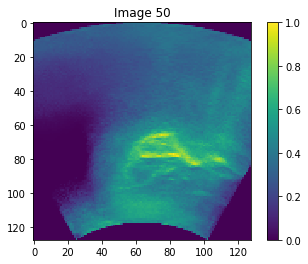

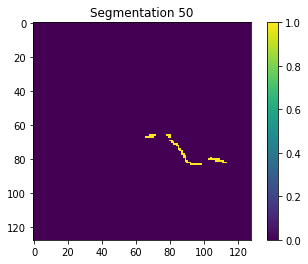

In [12]:
import matplotlib.pyplot as plt

if train_num_images > 0:
    image_index = train_num_images // 2
    print("Showing image #{} of {}".format(image_index, train_num_images))
    plt.imshow(train_image_data[image_index, :, :, 0].astype(np.float32))
    plt.colorbar()
    plt.title("Image " + str(image_index))
    plt.show()
    plt.imshow(train_segmentation_data[image_index, :, :, 0].astype(np.float32))
    plt.colorbar()
    plt.title("Segmentation " + str(image_index))
    plt.show()

In [13]:
if ":" in output_folder or "\\" in output_folder:
    output_fullpath = output_folder
else:
    output_fullpath = os.path.join(root_folder, output_folder)

if not os.path.exists(output_fullpath):
    os.makedirs(output_fullpath)
    print("Created folder: " + output_fullpath)

train_image_fullname = os.path.join(output_fullpath, train_image_filename)
train_segmentation_fullname = os.path.join(output_fullpath, train_segmentation_filename)

test_image_fullname = os.path.join(output_fullpath, test_image_filename)
test_segmentation_fullname = os.path.join(output_fullpath, test_segmentation_filename)

if train_num_images > 0:
    print("Saving training images to:         {}".format(train_image_fullname))
    print("Saving training segmentations to:  {}".format(train_segmentation_fullname))
    np.save(train_image_fullname, train_image_data)
    np.save(train_segmentation_fullname, train_segmentation_data)
else:
    print("No training data was saved.")

if test_num_images > 0:
    print("Saving test images to:        {}".format(test_image_fullname))
    print("Saving test segmentations to: {}".format(test_segmentation_fullname))
    np.save(test_image_fullname, test_image_data)
    np.save(test_segmentation_fullname, test_segmentation_data)
else:
    print("Test data was not split.")

Saving training images to:         d:\Data\VerdureSegmentations\Arrays\385_Axial_CS_ultrasound
Saving training segmentations to:  d:\Data\VerdureSegmentations\Arrays\385_Axial_CS_segmentation
Test data was not split.
